### Feature Engeening of Housing Project

#### Importing Necessary Liabries.

In [87]:
#data-manuplation
import pandas as pd
import numpy as np

#ml_tools
from sklearn.preprocessing import PowerTransformer,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,ElasticNet,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor,StackingRegressor

#result_visualitation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading dataset

In [278]:
df=pd.read_csv("nepalhousing_dataset.csv")
df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,lalitpur
2,imadol,19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,lalitpur


##### FROM EDA we found the amminites has no much corelation with price so ,

In [279]:

df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,lalitpur
2,imadol,19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,lalitpur


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOCATION      2715 non-null   object 
 1   PRICE         2566 non-null   float64
 2   LAND AREA     2689 non-null   float64
 3   ROAD ACCESS   2715 non-null   int64  
 4   FACING        2643 non-null   object 
 5   FLOOR         2662 non-null   float64
 6   BEDROOM       2519 non-null   float64
 7   BATHROOM      2460 non-null   float64
 8   PROPERTY AGE  2685 non-null   float64
 9   CITY          2715 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 212.2+ KB


In [281]:
df.isnull().sum()

LOCATION          0
PRICE           149
LAND AREA        26
ROAD ACCESS       0
FACING           72
FLOOR            53
BEDROOM         196
BATHROOM        255
PROPERTY AGE     30
CITY              0
dtype: int64

In [282]:
for feature in df.columns:
    try:
        print(f"The minimun value of {feature} is :{df[feature].min()}")
    except: pass

The minimun value of LOCATION is : bafal
The minimun value of PRICE is :2680000.0
The minimun value of LAND AREA is :0.0
The minimun value of ROAD ACCESS is :0
The minimun value of FLOOR is :1.0
The minimun value of BEDROOM is :1.0
The minimun value of BATHROOM is :1.0
The minimun value of PROPERTY AGE is :1.0
The minimun value of CITY is :bhaktapur


In [283]:
df['LAND AREA']=df['LAND AREA'].replace(to_replace={0:np.nan,2.5:np.nan,4.2:np.nan,4.5:np.nan,9.25:np.nan})

### FEATURE EXTRACTION

#### SIMPLE IMPUTER

In [284]:
df['ROAD ACCESS']=df['ROAD ACCESS'].fillna(value=df['ROAD ACCESS'].median())
df['FACING']=df['FACING'].fillna(value=df['FACING'].mode()[0])
df['FLOOR']=df['FLOOR'].fillna(value=df['FLOOR'].median())
df['BEDROOM']=df['BEDROOM'].fillna(value=df['BEDROOM'].median())
df['BATHROOM']=df['BATHROOM'].fillna(value=df['BATHROOM'].median())

#### DROPNA

In [285]:
df=df.dropna()

In [286]:
df.shape

(2524, 10)

#### NUMERICAL FEATURES


In [287]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


#### CATEGORICAL FEATURES

In [288]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [289]:
df.sample(5)

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
1629,tikathali,22000000.0,889.850,12,east-south,2.5,6.0,4.0,5.0,lalitpur
2697,sano bhanrayang,34000000.0,1471.675,13,east,2.5,5.0,4.0,6.0,kathmandu
138,sanagaun,16000000.0,1779.700,13,east-north,2.5,4.0,3.0,11.0,lalitpur
1779,nakhudole,27500000.0,1369.000,10,south,2.5,3.0,4.0,4.0,lalitpur
1860,jarankhu,65000000.0,5476.000,12,west,2.5,5.0,3.0,4.0,kathmandu


#### SPLITING DF INTO X AND Y
* X - are the features that are dependent
* y- is the target feature.

In [290]:
X=df.drop(columns="PRICE",axis=1)
y=df["PRICE"]

#### CHECKING SKEWNESS
* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [291]:
X.skew(numeric_only=True)

LAND AREA       10.654418
ROAD ACCESS     23.073859
FLOOR            1.649572
BEDROOM          4.494306
BATHROOM         5.780115
PROPERTY AGE     1.324051
dtype: float64

##### The features like land_area,road_acess,floor,bedroom,bathroom are screkwed so should be treated well.

Text(0.5, 1.0, 'KDE plot of y after log_transf')

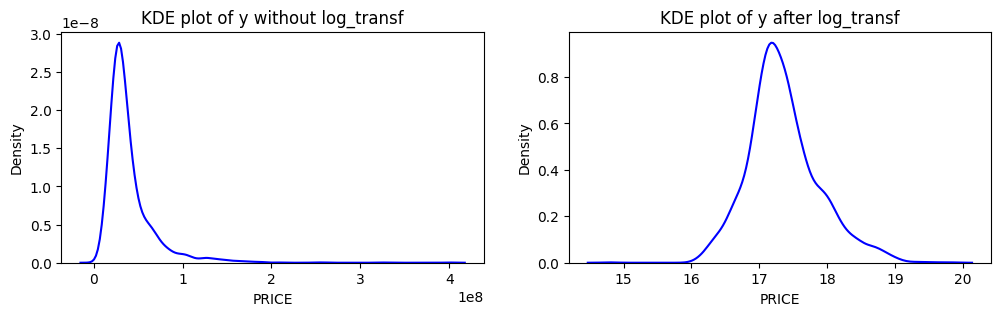

In [292]:
y_log=np.log(y+1)

fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.kdeplot(data=y,ax=ax[0],color="blue")
ax[0].set_title('KDE plot of y without log_transf')

sns.kdeplot(data=y_log,ax=ax[1],color="blue")
ax[1].set_title('KDE plot of y after log_transf')

#### log_transfromation in target value.


In [293]:
y=np.log(y+1)

<Axes: xlabel='FACING', ylabel='Count'>

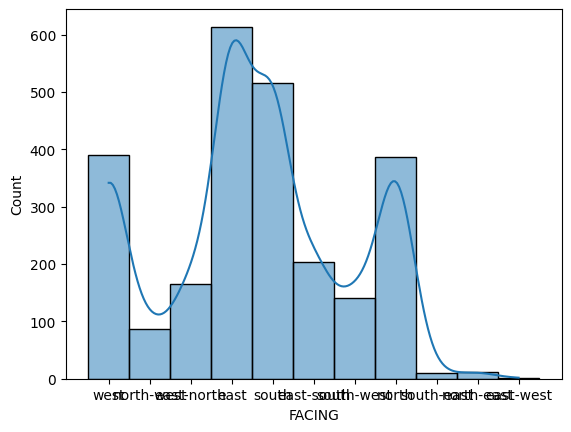

In [294]:
sns.histplot(data=X['FACING'],kde=True)

In [295]:
from sklearn.preprocessing import MinMaxScaler
oe=OrdinalEncoder()
minmax=MinMaxScaler()

X_facing=oe.fit_transform(X[["FACING"]])


X_facing_copy=pd.DataFrame(X_facing,columns=['FACING'])

<Axes: xlabel='FACING', ylabel='Count'>

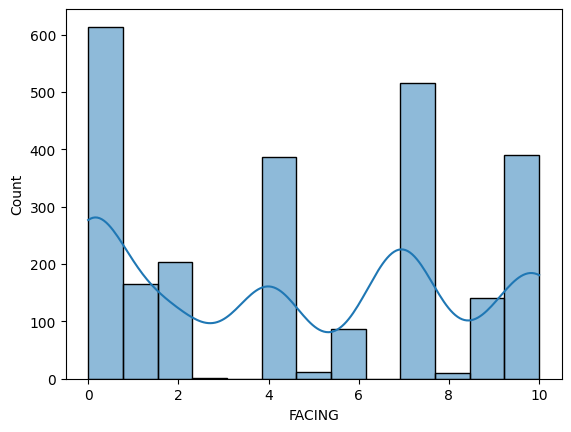

In [296]:
sns.histplot(data=X_facing_copy['FACING'],kde=True)

Text(0.5, 1.0, 'AFTER SCALING')

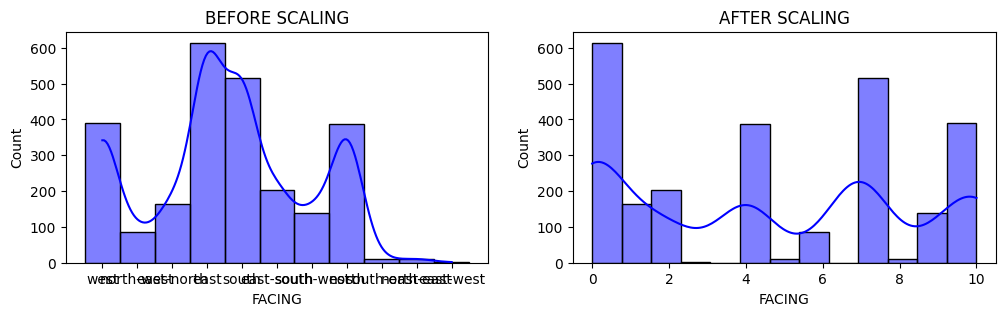

In [297]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue",kde=True)
ax[0].set_title('BEFORE SCALING')

sns.histplot(data=X_facing_copy['FACING'],ax=ax[1],color="blue",kde=True)
ax[1].set_title('AFTER SCALING')

In [298]:
X['FACING']=oe.fit_transform(X[["FACING"]])

In [299]:
X.head()

,LOCATION,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,1369.000,12,10.0,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,1026.750,10,10.0,4.5,5.0,6.0,5.0,lalitpur
2,imadol,787.175,10,10.0,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,2395.750,12,6.0,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,1095.200,13,6.0,2.5,4.0,3.0,7.0,lalitpur


In [300]:
city_maping={"kathmandu":0,
             "lalitpur":-1,
             "bhaktapur":1}

X['CITY']=X['CITY'].map(city_maping)

In [301]:
ore=OrdinalEncoder()
X["LOCATION"] = ore.fit_transform(X[["LOCATION"]])


In [302]:
#location_maping=X["LOCATION"].value_counts()
#X["LOCATION"]=X['LOCATION'].map(location_maping)

#### POWER TRANSFORMATION

In [303]:
pt=PowerTransformer(method='yeo-johnson')

tranfrom_feature=["LAND AREA","ROAD ACCESS","FLOOR","BEDROOM","BATHROOM"]

X[tranfrom_feature]=pt.fit_transform(X[tranfrom_feature])

In [304]:
X[tranfrom_feature].skew() 

LAND AREA     -0.290761
ROAD ACCESS   -0.306640
FLOOR          0.017349
BEDROOM       -0.076030
BATHROOM       0.064506
dtype: float64

In [305]:
X["CITY"]=StandardScaler().fit_transform(X[["CITY"]])

### TRAIN TEST SPLIT

In [306]:
X

,LOCATION,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,208.0,-0.131626,-0.469749,10.0,0.544747,0.009121,0.083785,5.0,-1.439218
1,353.0,-0.878624,-1.020523,10.0,2.285224,0.009121,1.279318,5.0,-1.439218
2,208.0,-1.657690,-1.020523,10.0,-0.174450,-0.643453,0.083785,21.0,-1.439218
3,102.0,1.076642,-0.469749,6.0,-0.174450,-0.643453,-0.680576,22.0,-1.439218
4,102.0,-0.702729,-0.227693,6.0,-0.174450,-0.643453,-0.680576,7.0,-1.439218
...,...,...,...,...,...,...,...,...,...
2710,61.0,0.147968,0.399914,4.0,-0.174450,-0.643453,0.083785,5.0,0.564415
2711,7.0,0.147968,0.399914,7.0,0.544747,-1.480042,-0.680576,5.0,0.564415
2712,66.0,0.247586,0.399914,7.0,-0.174450,-0.643453,-1.633685,9.0,0.564415
2713,53.0,0.871301,0.399914,6.0,-0.174450,0.009121,-0.680576,4.0,0.564415


In [307]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=43
)

In [309]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LGBMRegressor(),
    RandomForestRegressor(),



]

# Metrics to evaluate
accuracy_metrics = [mean_absolute_error, root_mean_squared_error, r2_score]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for metric in accuracy_metrics:
        score = metric(y_test, y_pred)
        result = {"model":model.__class__.__name__,"metric":metric.__name__,"score":score}
        print(f'The {metric.__name__} of {model.__class__.__name__} is: {score}')
    print('-----------------------------------------------------------------')
        



The mean_absolute_error of LinearRegression is: 0.2351037970990056
The root_mean_squared_error of LinearRegression is: 0.3357244442560449
The r2_score of LinearRegression is: 0.6314274952637022
-----------------------------------------------------------------
The mean_absolute_error of DecisionTreeRegressor is: 0.30310466004013564
The root_mean_squared_error of DecisionTreeRegressor is: 0.4498829785741218
The r2_score of DecisionTreeRegressor is: 0.3381552464858357
-----------------------------------------------------------------
The mean_absolute_error of XGBRegressor is: 0.23422386262524053
The root_mean_squared_error of XGBRegressor is: 0.3491932909091839
The r2_score of XGBRegressor is: 0.6012609326053233
-----------------------------------------------------------------
The mean_absolute_error of Ridge is: 0.23513094563059994
The root_mean_squared_error of Ridge is: 0.33574851479486256
The r2_score of Ridge is: 0.6313746420564124
----------------------------------------------------

#### FROM THE ABOVE MODEL TEST WE ARE PICKING 3 MODEL- DecisionTree , XGBoost ,LightGB

In [275]:
from sklearn.model_selection import GridSearchCV

#### Grid Search CV for Decisiion Tree Regressor

In [ ]:
#grid search cv

param_grid = {
    'max_depth': [1,2,3,4,5,10,20,15,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error', 'poisson','friedman_mse']
}

grid_search_decision_tree=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,cv=8)

grid_search_decision_tree.fit(X_train,y_train)

print("Best Parameters:", grid_search_decision_tree.best_params_)
print("Best Score (MSE):", grid_search_decision_tree.best_score_)


KeyboardInterrupt: 

#### Hyperparameter Tuning LIGHTGB

In [119]:
lgb = LGBMRegressor(random_state=42)

# Define the parameter grid
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform Grid Search
grid_search_lgb = GridSearchCV(estimator=lgb, param_grid=param_grid_lgb, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
print("Best R2 score for LightGBM:", grid_search_lgb.best_score_)

Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


KeyboardInterrupt: 

In [120]:

random_search_lgb = RandomizedSearchCV(estimator=lgb, param_distributions=param_grid_lgb, cv=5, scoring='r2', n_iter=50, random_state=43, verbose=1, n_jobs=-1)
random_search_lgb.fit(X_train, y_train)

print("Best parameters for LightGBM:", random_search_lgb.best_params_)
print("Best R2 score for LightGBM:", random_search_lgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 2019, number of used features: 9
[LightGBM] [Info] Start training from score 17.353647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters for LightGBM: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 20, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best R2 score for LightGBM: 0.6324412570549605


### USING COLUMN TRANSFORMER

In [7]:
import dill
with open(r"D:\Project\nepalhousingproject\artifact\02_04_2025_10_27_22\data_transformation\transformed_object\preprocessing.pkl",
          "rb") as file_obj:
    trf=dill.load(file_obj)


In [193]:
df=pd.read_csv("nepalhousing_dataset.csv")
df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,lalitpur
2,imadol,19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,lalitpur


In [194]:
df['LAND AREA']=df['LAND AREA'].replace(to_replace={0:np.nan,2.5:np.nan,4.2:np.nan,4.5:np.nan,9.25:np.nan})

In [195]:
df["FACING"].unique()

array(['west', 'north-west', 'east-north', 'east', 'south', 'east-south',
       'south-west', 'north', nan, 'south-east', 'north-east',
       'east-west'], dtype=object)

In [196]:
df=df.dropna(subset=["PRICE","LAND AREA"])

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [198]:
df.columns

Index(['LOCATION', 'PRICE', 'LAND AREA', 'ROAD ACCESS', 'FACING', 'FLOOR',
       'BEDROOM', 'BATHROOM', 'PROPERTY AGE', 'CITY'],
      dtype='object')

In [199]:
df.isnull().sum()

LOCATION          0
PRICE             0
LAND AREA         0
ROAD ACCESS       0
FACING           51
FLOOR            36
BEDROOM         168
BATHROOM        222
PROPERTY AGE     23
CITY              0
dtype: int64

In [200]:
city_maping={"kathmandu":0,
             "lalitpur":-1,
             "bhaktapur":1}

df['CITY']=df['CITY'].map(city_maping)

In [201]:
df.columns

Index(['LOCATION', 'PRICE', 'LAND AREA', 'ROAD ACCESS', 'FACING', 'FLOOR',
       'BEDROOM', 'BATHROOM', 'PROPERTY AGE', 'CITY'],
      dtype='object')

In [202]:
ohe=["LOCATION"]
tranfrom_feature=["LAND AREA","ROAD ACCESS","FLOOR","BEDROOM","BATHROOM"]
si_num=['FLOOR','BEDROOM','BATHROOM','PROPERTY AGE',]
si_cat=['FACING']
ore=["FACING"]
new=['LOCATION',"FACING"]

In [203]:
trn_pipe=Pipeline(steps=[
    ("power",PowerTransformer(method="yeo-johnson"))
])

In [204]:
ct=ColumnTransformer(transformers=[
    ('si_cate',SimpleImputer(strategy='most_frequent'),si_cat),
    ('si_num',SimpleImputer(strategy="median"),si_num),
    ("ohe",OneHotEncoder(sparse_output=False,handle_unknown="infrequent_if_exist"),ohe),
    ("ore",OrdinalEncoder(),ore),
    ('pipe',trn_pipe,tranfrom_feature)
    
],remainder="passthrough")

In [205]:
X_train,X_test,y_train,y_test=train_test_split(
    df.drop(columns="PRICE"),
    df['PRICE'],
    test_size=0.2,random_state=43
)

In [206]:
X=df.drop(columns="PRICE")

In [207]:
ct.fit(X)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

In [208]:
X_train

array([['south', 2.0, 4.0, ..., -0.6242255376824293, -1.5636740349264948,
        -1],
       ['south', 2.5, 5.0, ..., 0.009077186742512872,
        0.08877667538080601, 0],
       ['east', 2.0, 5.0, ..., 0.009077186742512872, 0.08877667538080601,
        0],
       ...,
       ['north', 2.5, 6.0, ..., 0.524429919160154, -2.8045431174939077,
        -1],
       ['west', 2.5, 5.0, ..., 0.009077186742512872, 0.7037165655394576,
        -1],
       ['east', 3.5, 14.0, ..., 2.8231938045529623, 1.702015950607794, 0]],
      dtype=object)

In [104]:
y_train=np.log(y_train+1)
y_test=np.log(y_test+1)

In [105]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LGBMRegressor()


]

# Metrics to evaluate
accuracy_metrics = [mean_absolute_error, root_mean_squared_error, r2_score]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for metric in accuracy_metrics:
        score = metric(y_test, y_pred)
        result = {"model":model.__class__.__name__,"metric":metric.__name__,"score":score}
        print(f'The {metric.__name__} of {model.__class__.__name__} is: {score}')
    print('-----------------------------------------------------------------')
        



ValueError: could not convert string to float: 'south'

In [173]:
ore_tr=OrdinalEncoder()

ore_tr.fit(X[["FACING"]])
print(ore_tr.transform(X[['FACING']]))


[[10.]
 [10.]
 [10.]
 ...
 [ 7.]
 [ 6.]
 [ 4.]]


In [171]:
trf.fit(X)
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)